## Kudryavtsev Model

* Link to this notebook: https://github.com/csdms/pymt/blob/master/notebooks/ku.ipynb
* Install command: `$ conda install notebook pymt_permamodel`
* Download local copy of notebook:

  `$ curl -O https://raw.githubusercontent.com/csdms/pymt/master/notebooks/ku.ipynb`

### Introduction to Permafrost Processes - Lesson 2 Kudryavtsev Model

This lab has been designed and developed by Irina Overeem and Mark Piper, CSDMS, University of Colorado, CO 
with assistance of Kang Wang, Scott Stewart at CSDMS, University of Colorado, CO, and Elchin Jafarov, at Los Alamos National Labs, NM. 
These labs are developed with support from NSF Grant 1503559, ‘Towards a Tiered Permafrost Modeling Cyberinfrastructure’ 

### Classroom organization

This lab is the second in a series of introduction to permafrost process modeling, designed for inexperienced users. In this first lesson, we explore the Air Frost Number model and learn to use the CSDMS Python Modeling Toolkit ([PyMT](https://github.com/csdms/pymt)). We implemented a basic configuration of the Air Frost Number (as formulated by Nelson and Outcalt in 1987). This series of labs is designed for inexperienced modelers to gain some experience with running a numerical model, changing model inputs, and analyzing model output. Specifically, this first lab looks at what controls permafrost occurrence and compares the occurrence of permafrost in Russia. 
Basic theory on the Air Frost Number is presented in [Frost Number Model Lecture 1](https://csdms.colorado.edu/wiki/File:FrostNumberModel_Lecture1.pptx).

This lab is the second in a series of introduction to permafrost process modeling, designed for inexperienced users. In this second lesson, we explore the Kudryavstev model and learn to use the CSDMS Python Modeling Toolkit ([PyMT](https://github.com/csdms/pymt)). We implemented the Kudryavstev model (as formulated in Anisimov et al.1997). It is dubbed the Ku-model. This series of labs is designed for inexperienced modelers to gain some experience with running a numerical model, changing model inputs, and analyzing model output. Specifically, this lab looks at what controls soil temperature and active layer thickness and compares model output with observed longterm data collected at permafrost active layer thickness monitoring sites in Fairbanks and Barrow, Alaska. 
Basic theory on the Kudryavstev model is presented in [Kudryavtsev Model Lecture 2](https://csdms.colorado.edu/wiki/File:KudryavtsevModel_Lecture2.pptx)

This lab will likely take ~ 1,5 hours to complete in the classroom. This time assumes you are unfamiiar with the PyMT and need to learn setting parameters, saving runs, downloading data and looking at output (otherwise it will be much faster).

We will use netcdf files for output, this is a standard output from all CSDMS models. If you have no experience with visualizing these files, Panoply software will be helpful. Find instructions on how to use this software.

### Learning objectives

#### Skills

* familiarize with a basic configuration of the Kudryavstev Model for 1D (a single location).
* hands-on experience with visualizing NetCDF time series with Panoply.
* data to model comparisons and how to think about uncertainty in data and model output.

#### Topical learning objectives:

* what are controls on permafrost soil temperature
* what is a steady-state model
* what are important parameters for calculating active layer thickness
* active layer thickness evolution with climate warming in two locations in Alaska

### References and More information 

Anisimov, O. A., Shiklomanov, N. I., & Nelson, F. E. (1997). *Global warming and active-layer thickness: results from transient general circulation models.* Global and Planetary Change, 15(3-4), 61-77. DOI:10.1016/S0921-8181(97)00009-X  
Sazonova, T.S., Romanovsky, V.E., 2003. *A model for regional-scale estimation of temporal and spatial variability of active layer thickness and mean nnaual ground emperatures.* Permafrost and periglacial processes 14, 125-139. DOI: 10.1002/ppp.449  
Zhang, T., 2005. *Influence of the seasonal snow cover on the ground thermal regime: an overview.* Review of Geophysics, 43, RG4002.


### The Kudryavtsev Model

The Kudryavtsev et al. (1974), or *Ku* model, presents an
approximate solution of the Stefan problem. The model provides a
steady-state solution under the assumption of sinusoidal air
temperature forcing. It considers snow, vegetation, and soil layers
as thermal damping to variation of air temperature. The layer of
soil is considered to be a homogeneous column with different thermal
properties in the frozen and thawed states. The main outputs are
annual maximum frozen/thaw depth and mean annual temperature at the
top of permafrost (or at the base of the active layer). It can be
applied over a wide variety of climatic conditions.

In [1]:
# Load standard Python modules
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load PyMT model(s)
import pymt.models

ku = pymt.models.Ku()

➡ models: FrostNumber, Ku, Hydrotrend


### Part 1

We will run the Kudryatsev model for conditions in Barrow, Alaska in a very cold year, 1964. The mean annaul temperature for 1964 was -15.21C, the amplitude over that year was 18.51C. It was close to normal snow year, meaning the average snow thickness over this winter was 0.22m.

Adapt the settings in the Ku model for Barrow 1964. Make sure you request an output file. Save the simulation settings and submit your simulation. Download the model results and open them in Panoply.

In [3]:
config_file, run_folder = ku.setup(T_air=-15.21, A_air=18.51)

In [4]:
ku.initialize(config_file, run_folder)

 
Ku model component: Initializing...


In [5]:
ku.update()

In [6]:
ku.output_var_names

('soil__temperature', 'soil__active_layer_thickness')

In [7]:
ku.get_value("soil__active_layer_thickness")

array([ 0.25622575])

#### Q1.1: What was the active layer thickness the model predicted? 

*Sketch a soil profile for winter conditions versus August conditions, indicate where the frozen-unfrozen boundary is in each two cases.*

#### Q1.2: How do you think snow affects the active layer thickness predictions? 

### Part 2

Run the Kudryatsev model with a range of snow conditions (0 m as the one extreme, and in extremely snowy years, the mean snow thickness over the winter is 0.4m in Barrow). Set these two simulations, run them and dowload the files.

In [8]:
args = ku.setup(h_snow=0.0)

In [9]:
ku.initialize(*args)
ku.update()
ku.get_value("soil__active_layer_thickness")

 
Ku model component: Initializing...


array([ 0.12506836])

In [10]:
args = ku.setup(h_snow=0.4)

In [11]:
ku.initialize(*args)
ku.update()
ku.get_value("soil__active_layer_thickness")

 
Ku model component: Initializing...


array([ 0.29543607])

#### Q2.1: What happens if there is no snow at all (0 m)?  

#### Q2.2: What is the active layer thickness prediction for a very snowy year?

### Part 3

Run the Kudryatsev model with a range of soil water contents. What happens if there is 20% more, and 20% less soil water content? 

In [12]:
args = ku.setup(vwc_H2O=0.2)
ku.initialize(*args)
ku.update()
ku.get_value("soil__active_layer_thickness")

 
Ku model component: Initializing...


array([ 0.46966741])

In [13]:
args = ku.setup(vwc_H2O=0.6)
ku.initialize(*args)
ku.update()
ku.get_value("soil__active_layer_thickness")

 
Ku model component: Initializing...


array([ 0.20328717])

#### Q3.1: Is this selected range of 20% realistic for soils in permafrost regions?

#### Q3.2: From the theory presented in the associated lecture notes, how do you think soil water content in summer affects the soil temperature?

### Part 4

Posted here are time-series for climate conditions for both Barrow and Fairbanks, Alaska. Time-series are annual values and run from 1961-2015, the data include mean annual temperature (MAAT), temperature amplitude (TAMP) and winter-average snow depth (SD). 

These are text files, so you can plot them in your own favorite software or programming language.

Choose which case you want to run, you will now run a 55 year simulation. 

In [14]:
import pandas

data = pandas.read_csv(
    "https://raw.githubusercontent.com/mcflugen/pymt_ku/master/data/Barrow_1961-2015.csv"
)
data

,atmosphere_bottom_air__temperature,snowpack__depth,atmosphere_bottom_air__temperature_amplitude
0,-13.1980,0.29612,18.070
1,-10.7460,0.40822,15.538
2,-12.0420,0.27510,15.694
3,-15.2060,0.21657,18.519
4,-12.7290,0.24719,17.937
5,-13.1050,0.31827,16.743
6,-11.9630,0.21748,14.936
7,-12.2300,0.30102,18.760
8,-12.8220,0.19425,14.966
9,-13.8100,0.13143,15.582


In [15]:
maat = data["atmosphere_bottom_air__temperature"]
tamp = data["atmosphere_bottom_air__temperature_amplitude"]
snow_depth = data["snowpack__depth"]

In [16]:
ku = pymt.models.Ku()
args = ku.setup(end_year=2050)
ku.initialize(*args)

 
Ku model component: Initializing...


In [17]:
n_steps = int((ku.end_time - ku.time) / ku.time_step)
thickness = np.empty(n_steps)
for i in range(n_steps):
    ku.set_value("atmosphere_bottom_air__temperature", maat.values[i])
    ku.set_value("atmosphere_bottom_air__temperature_amplitude", tamp.values[i])
    ku.set_value("snowpack__depth", snow_depth.values[i])
    ku.update()
    thickness[i] = ku.get_value("soil__active_layer_thickness")

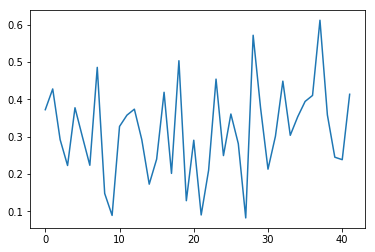

In [18]:
plt.plot(
    thickness
)  # This should be the same as the above but it's NOT! But now it is. BOOM!